# Project 3

## Joseph Naro

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential, layers
from tensorflow.keras.models import clone_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Part I: 1

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

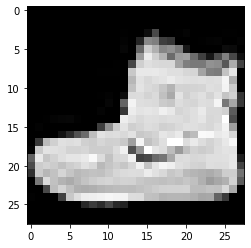

In [8]:
plt.imshow(x_train[0], cmap='gray')

In [9]:
# transforming data to appropriate inputs for neural networks
x_train = np.array(x_train) / 255.
x_test = np.array(x_test) / 255.
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [10]:
x_train.shape

(60000, 28, 28, 1)

# Part I: 2 & 3

### I have trained 5 neural networks on the unaugmented data to find good starting points for the networks that will learn from the larger augmented datasets.

In [11]:
mnist_model_2d = Sequential()
mnist_model_2d.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_model_2d.add(layers.Conv2D(kernel_size=3, filters=64, activation='relu'))
mnist_model_2d.add(layers.Conv2D(kernel_size=3, filters=64, activation='relu'))
mnist_model_2d.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
mnist_model_2d.add(layers.Conv2D(kernel_size=3, filters=16, activation='relu'))
mnist_model_2d.add(layers.Flatten())
mnist_model_2d.add(layers.Dense(256, activation='relu'))
mnist_model_2d.add(layers.Dense(10, activation='softmax'))
mnist_model_2d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 16)        4624      
_________________________________________________________________
flatten (Flatten)            (None, 5776)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [12]:
mnist_model_2d.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [13]:
mnist_model_2d_history = mnist_model_2d.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4554 - accuracy: 0.8334 - sparse_categorical_crossentropy: 0.4554 - val_loss: 0.3207 - val_accuracy: 0.8830 - val_sparse_categorical_crossentropy: 0.3207
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2813 - accuracy: 0.8966 - sparse_categorical_crossentropy: 0.2813 - val_loss: 0.2724 - val_accuracy: 0.9009 - val_sparse_categorical_crossentropy: 0.2724
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2244 - accuracy: 0.9170 - sparse_categorical_crossentropy: 0.2244 - val_loss: 0.2837 - val_accuracy: 0.9013 - val_sparse_categorical_crossentropy: 0.2837
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1793 - accuracy: 0.9341 - sparse_categorical_crossentropy: 0.1793 - val_loss: 0.2583 - val_accuracy: 0.9124 - val_sparse_categorical_crossentropy: 0.2583
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0

In [14]:
mnist_model_2d_score = mnist_model_2d.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5544 - accuracy: 0.8978 - sparse_categorical_crossentropy: 0.5544


## This network is comprised of small kernels with relatively few filters. It trained very fast, and as the plots below show, reached it's potential almost immediately. 

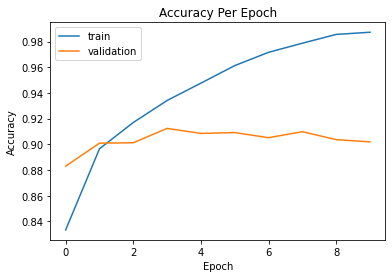

In [15]:
plt.plot(mnist_model_2d_history.history['accuracy'])
plt.plot(mnist_model_2d_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

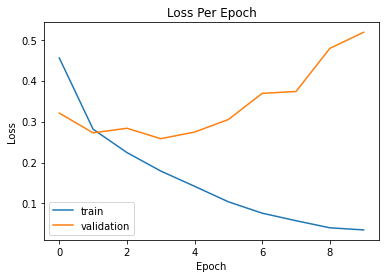

In [16]:
plt.plot(mnist_model_2d_history.history['loss'])
plt.plot(mnist_model_2d_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [17]:
mnist_model_2d_2 = Sequential()
mnist_model_2d_2.add(layers.Conv2D(kernel_size=4, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_model_2d_2.add(layers.Conv2D(kernel_size=5, filters=64, activation='relu'))
mnist_model_2d_2.add(layers.Conv2D(kernel_size=5, filters=32, activation='relu'))
mnist_model_2d_2.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
mnist_model_2d_2.add(layers.Conv2D(kernel_size=5, filters=16, activation='relu'))
mnist_model_2d_2.add(layers.Flatten())
mnist_model_2d_2.add(layers.Dense(256, activation='relu'))
mnist_model_2d_2.add(layers.Dense(10, activation='softmax'))
mnist_model_2d_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        102464    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 32)        51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        12816     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [18]:
mnist_model_2d_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [19]:
mnist_model_2d_2_history = mnist_model_2d_2.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 6s 9ms/step - loss: 0.5786 - accuracy: 0.7876 - sparse_categorical_crossentropy: 0.5786 - val_loss: 0.4336 - val_accuracy: 0.8422 - val_sparse_categorical_crossentropy: 0.4336
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3712 - accuracy: 0.8625 - sparse_categorical_crossentropy: 0.3712 - val_loss: 0.3417 - val_accuracy: 0.8748 - val_sparse_categorical_crossentropy: 0.3417
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3142 - accuracy: 0.8830 - sparse_categorical_crossentropy: 0.3142 - val_loss: 0.2973 - val_accuracy: 0.8913 - val_sparse_categorical_crossentropy: 0.2973
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2834 - accuracy: 0.8954 - sparse_categorical_crossentropy: 0.2834 - val_loss: 0.2822 - val_accuracy: 0.8963 - val_sparse_categorical_crossentropy: 0.2822
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2583

In [20]:
mnist_model_2d_2_score = mnist_model_2d_2.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8994 - sparse_categorical_crossentropy: 0.3096


## This network is the same as the last on, with the exception that the kernels are slightly larger. We can see this resulted in training time being reduced by a 25% per epoch. The accuracies are basically the same between the two models, but we can see from the graphs below that this model took a few more epochs to reach its optimal parameters.

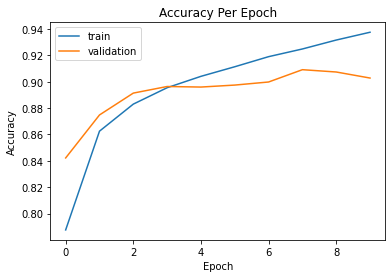

In [21]:
plt.plot(mnist_model_2d_2_history.history['accuracy'])
plt.plot(mnist_model_2d_2_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

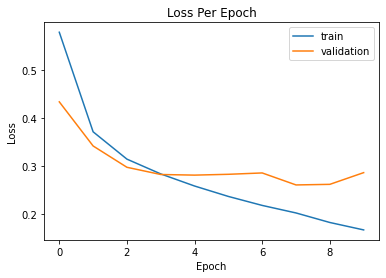

In [22]:
plt.plot(mnist_model_2d_2_history.history['loss'])
plt.plot(mnist_model_2d_2_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [23]:
mnist_model_2d_3 = Sequential()
mnist_model_2d_3.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_model_2d_3.add(layers.Dropout(0.3))
mnist_model_2d_3.add(layers.Conv2D(kernel_size=3, filters=64, activation='relu'))
mnist_model_2d_3.add(layers.Dropout(0.3))
mnist_model_2d_3.add(layers.Conv2D(kernel_size=3, filters=64, activation='relu'))
mnist_model_2d_3.add(layers.Dropout(0.3))
mnist_model_2d_3.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
mnist_model_2d_3.add(layers.Dropout(0.3))
mnist_model_2d_3.add(layers.Conv2D(kernel_size=3, filters=16, activation='relu'))
mnist_model_2d_3.add(layers.Dropout(0.3))
mnist_model_2d_3.add(layers.Flatten())
mnist_model_2d_3.add(layers.Dense(256, activation='relu'))
mnist_model_2d_3.add(layers.Dense(10, activation='softmax'))
mnist_model_2d_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 23, 23, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 32)       

In [24]:
mnist_model_2d_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [25]:
mnist_model_2d_3_history = mnist_model_2d_3.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 11s 14ms/step - loss: 0.5359 - accuracy: 0.8019 - sparse_categorical_crossentropy: 0.5359 - val_loss: 0.3709 - val_accuracy: 0.8643 - val_sparse_categorical_crossentropy: 0.3709
Epoch 2/10
750/750 [==============================] - 10s 14ms/step - loss: 0.3339 - accuracy: 0.8767 - sparse_categorical_crossentropy: 0.3339 - val_loss: 0.2839 - val_accuracy: 0.8945 - val_sparse_categorical_crossentropy: 0.2839
Epoch 3/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2726 - accuracy: 0.8984 - sparse_categorical_crossentropy: 0.2726 - val_loss: 0.2554 - val_accuracy: 0.9074 - val_sparse_categorical_crossentropy: 0.2554
Epoch 4/10
750/750 [==============================] - 10s 14ms/step - loss: 0.2444 - accuracy: 0.9090 - sparse_categorical_crossentropy: 0.2444 - val_loss: 0.2618 - val_accuracy: 0.9043 - val_sparse_categorical_crossentropy: 0.2618
Epoch 5/10
750/750 [==============================] - 10s 14ms/step - lo

In [26]:
mnist_model_2d_3_score = mnist_model_2d_3.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2754 - accuracy: 0.9147 - sparse_categorical_crossentropy: 0.2754


## This model is the same as the first model, with the exception that each convolution is followed by a dropout layer. This increased epoch training time by 25% and caused the model to take slightly longer to reach optimal parameters, as can be seen below. However, it also resulted in an accuracy boost of 1% one the test set.

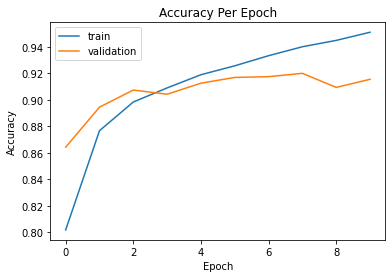

In [27]:
plt.plot(mnist_model_2d_3_history.history['accuracy'])
plt.plot(mnist_model_2d_3_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

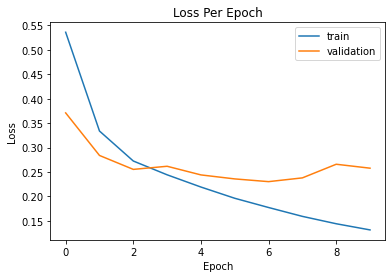

In [28]:
plt.plot(mnist_model_2d_3_history.history['loss'])
plt.plot(mnist_model_2d_3_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [29]:
mnist_model_2d_4 = Sequential()
mnist_model_2d_4.add(layers.Conv2D(kernel_size=4, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_model_2d_4.add(layers.Dropout(0.3))
mnist_model_2d_4.add(layers.Conv2D(kernel_size=5, filters=64, activation='relu'))
mnist_model_2d_4.add(layers.Dropout(0.3))
mnist_model_2d_4.add(layers.Conv2D(kernel_size=5, filters=32, activation='relu'))
mnist_model_2d_4.add(layers.Dropout(0.3))
mnist_model_2d_4.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
mnist_model_2d_4.add(layers.Dropout(0.3))
mnist_model_2d_4.add(layers.Conv2D(kernel_size=5, filters=16, activation='relu'))
mnist_model_2d_4.add(layers.Dropout(0.3))
mnist_model_2d_4.add(layers.Flatten())
mnist_model_2d_4.add(layers.Dense(256, activation='relu'))
mnist_model_2d_4.add(layers.Dense(10, activation='softmax'))
mnist_model_2d_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        102464    
_________________________________________________________________
dropout_6 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 32)        51232     
_________________________________________________________________
dropout_7 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 32)       

In [30]:
mnist_model_2d_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [31]:
mnist_model_2d_4_history = mnist_model_2d_4.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.6417 - accuracy: 0.7602 - sparse_categorical_crossentropy: 0.6417 - val_loss: 0.4073 - val_accuracy: 0.8482 - val_sparse_categorical_crossentropy: 0.4073
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.3891 - accuracy: 0.8575 - sparse_categorical_crossentropy: 0.3891 - val_loss: 0.3316 - val_accuracy: 0.8782 - val_sparse_categorical_crossentropy: 0.3316
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.3436 - accuracy: 0.8742 - sparse_categorical_crossentropy: 0.3436 - val_loss: 0.3065 - val_accuracy: 0.8850 - val_sparse_categorical_crossentropy: 0.3065
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3121 - accuracy: 0.8830 - sparse_categorical_crossentropy: 0.3121 - val_loss: 0.2961 - val_accuracy: 0.8910 - val_sparse_categorical_crossentropy: 0.2961
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0

In [32]:
mnist_model_2d_4_score = mnist_model_2d_4.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2790 - accuracy: 0.9034 - sparse_categorical_crossentropy: 0.2790


## This model is the same as the second model but with dropout. We can see a small increase in training time, and a small increase in accuracy. The most interesting thing about this model is that it starts very close to its optimal accuracy and loss according to the plots below.

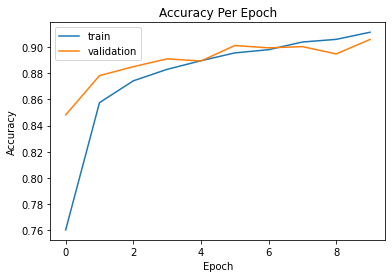

In [33]:
plt.plot(mnist_model_2d_4_history.history['accuracy'])
plt.plot(mnist_model_2d_4_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

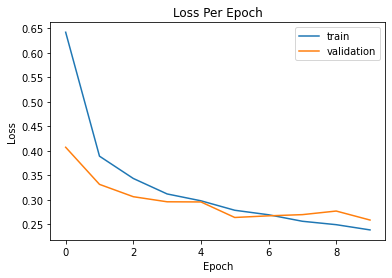

In [34]:
plt.plot(mnist_model_2d_4_history.history['loss'])
plt.plot(mnist_model_2d_4_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [35]:
mnist_model_2d_5 = Sequential()
mnist_model_2d_5.add(layers.Conv2D(kernel_size=4, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_model_2d_5.add(layers.Dropout(0.3))
mnist_model_2d_5.add(layers.Conv2D(kernel_size=5, filters=64, activation='relu'))
mnist_model_2d_5.add(layers.Dropout(0.3))
mnist_model_2d_5.add(layers.Conv2D(kernel_size=5, filters=32, activation='relu'))
mnist_model_2d_5.add(layers.Dropout(0.3))
mnist_model_2d_5.add(layers.Conv2D(kernel_size=7, filters=32, activation='relu'))
mnist_model_2d_5.add(layers.Dropout(0.3))
mnist_model_2d_5.add(layers.Flatten())
mnist_model_2d_5.add(layers.Dense(256, activation='relu'))
mnist_model_2d_5.add(layers.Dense(10, activation='softmax'))
mnist_model_2d_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 64)        102464    
_________________________________________________________________
dropout_11 (Dropout)         (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 17, 17, 32)        51232     
_________________________________________________________________
dropout_12 (Dropout)         (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)       

In [36]:
mnist_model_2d_5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [37]:
mnist_model_2d_5_history = mnist_model_2d_5.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.5729 - accuracy: 0.7875 - sparse_categorical_crossentropy: 0.5729 - val_loss: 0.3827 - val_accuracy: 0.8591 - val_sparse_categorical_crossentropy: 0.3827
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3623 - accuracy: 0.8654 - sparse_categorical_crossentropy: 0.3623 - val_loss: 0.3092 - val_accuracy: 0.8832 - val_sparse_categorical_crossentropy: 0.3092
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3158 - accuracy: 0.8824 - sparse_categorical_crossentropy: 0.3158 - val_loss: 0.2858 - val_accuracy: 0.8923 - val_sparse_categorical_crossentropy: 0.2858
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2866 - accuracy: 0.8931 - sparse_categorical_crossentropy: 0.2866 - val_loss: 0.2770 - val_accuracy: 0.8953 - val_sparse_categorical_crossentropy: 0.2770
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0

In [38]:
mnist_model_2d_5_score = mnist_model_2d_5.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9021 - sparse_categorical_crossentropy: 0.2697


## For this model, I took the previous model and replaced the the last two convolutional layers with one layer with a larger kernel size. Nothing really changed.

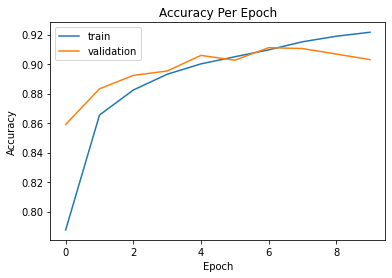

In [39]:
plt.plot(mnist_model_2d_5_history.history['accuracy'])
plt.plot(mnist_model_2d_5_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

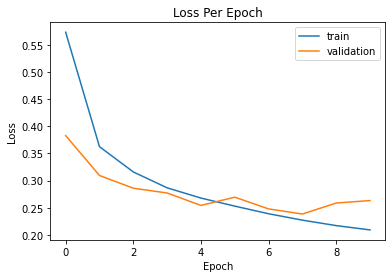

In [40]:
plt.plot(mnist_model_2d_5_history.history['loss'])
plt.plot(mnist_model_2d_5_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

## As we can see from the bar plot below, test accuracies were very similar, which makes sense, because the neural networks were relatively similar. The smaller kernels with dropout, model 3, did have a clear advantage though.

Text(0, 0.5, 'Test Accuracy')

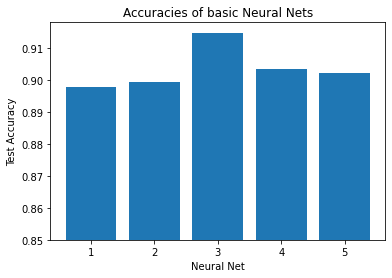

In [102]:
scores = np.array([mnist_model_2d_score[1], mnist_model_2d_2_score[1], mnist_model_2d_3_score[1], mnist_model_2d_4_score[1], mnist_model_2d_5_score[1]]) - .85
plt.bar(range(1,6), scores, bottom=.85)
plt.title('Accuracies of basic Neural Nets')
plt.xlabel('Neural Net')
plt.ylabel('Test Accuracy')

In [107]:
predictions = mnist_model_2d_3.predict(x_test)
confusion_matrix_1 = confusion_matrix(y_test, predictions.argmax(axis=1))
confusion_matrix_1

array([[855,   0,  20,  16,   4,   1, 100,   0,   4,   0],
       [  0, 970,   0,  15,   5,   0,   7,   0,   3,   0],
       [ 13,   0, 870,   7,  48,   0,  61,   0,   1,   0],
       [  8,   4,   9, 914,  44,   0,  18,   0,   3,   0],
       [  0,   0,  44,  23, 901,   0,  31,   0,   1,   0],
       [  0,   0,   0,   0,   0, 983,   0,  11,   1,   5],
       [ 81,   1,  37,  27,  87,   0, 759,   0,   8,   0],
       [  0,   0,   0,   0,   0,   5,   0, 985,   0,  10],
       [  1,   0,   6,   4,   4,   2,   8,   4, 971,   0],
       [  0,   0,   0,   0,   0,   6,   0,  54,   1, 939]])

## Below is the confusion matrix for model 3.

## The following are what each index represents

### 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot

## It looks like the model is having the most trouble identifing shirts. Perhaps this is because shirst cover so much of the area and can have different designs. On the other hand, the model knows sandals and sneakers very well.

# Part II: 1

In [42]:
# removing the validation data to avoid having augmented versions in the training set
x_valid = x_train[:int(len(x_train)*.2)]
y_valid = y_train[:int(len(y_train)*.2)]
x_train = x_train[int(len(x_train)*.2):]
y_train = y_train[int(len(y_train)*.2):]

In [43]:
x_train.shape

(48000, 28, 28, 1)

## I am adjusting the brightness up and down and flipping the image. I made sure to be symmetrical to avoid having the model only expect darker, lighter, or one direction oriented clothing.

In [44]:
x_train_aug = x_train
y_train_aug = y_train
future_x_data = []
future_y_data = []
augmenter = ImageDataGenerator()

for index in range(len(x_train)):
    future_x_data.append(augmenter.apply_transform(np.squeeze(x_train[index]), {'horizontal_vertical':True}))
    future_y_data.append(y_train[index])
    future_x_data.append(augmenter.apply_transform(np.squeeze(x_train[index]), {'horizontal_vertical':True, 'bringhtness':.5}))
    future_y_data.append(y_train[index])
    future_x_data.append(augmenter.apply_transform(np.squeeze(x_train[index]), {'horizontal_vertical':True, 'bringhtness':-.5}))
    future_y_data.append(y_train[index])
    future_x_data.append(augmenter.apply_transform(np.squeeze(x_train[index]), {'bringhtness':.5}))
    future_y_data.append(y_train[index])
    future_x_data.append(augmenter.apply_transform(np.squeeze(x_train[index]), {'bringhtness':-.5}))
    future_y_data.append(y_train[index])
    
x_train_aug = np.concatenate((x_train_aug, np.expand_dims(future_x_data,3)))
y_train_aug = np.concatenate((y_train_aug, future_y_data))

x_train_aug, y_train_aug = shuffle(x_train_aug, y_train_aug, random_state=42)

In [45]:
x_train_aug.shape

(288000, 28, 28, 1)

# Part II: 2 & 3

In [46]:
mnist_model_2d_3_aug_data = clone_model(mnist_model_2d_3)

In [47]:
mnist_model_2d_3_aug_data.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [50]:
mnist_model_2d_3_aug_data_history = mnist_model_2d_3_aug_data.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train)/64, epochs=10, verbose=1)
mnist_model_2d_3_aug_data.save_weights('/content/gdrive/My Drive/mnist_model_2d_3_aug_data.h5')

Epoch 1/10
750/750 [==============================] - 10s 14ms/step - loss: 0.1110 - accuracy: 0.9574 - sparse_categorical_crossentropy: 0.1110 - val_loss: 0.2831 - val_accuracy: 0.9175 - val_sparse_categorical_crossentropy: 0.2831
Epoch 2/10
750/750 [==============================] - 10s 14ms/step - loss: 0.1043 - accuracy: 0.9615 - sparse_categorical_crossentropy: 0.1043 - val_loss: 0.2909 - val_accuracy: 0.9114 - val_sparse_categorical_crossentropy: 0.2909
Epoch 3/10
750/750 [==============================] - 10s 14ms/step - loss: 0.1035 - accuracy: 0.9613 - sparse_categorical_crossentropy: 0.1035 - val_loss: 0.2723 - val_accuracy: 0.9179 - val_sparse_categorical_crossentropy: 0.2723
Epoch 4/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0886 - accuracy: 0.9668 - sparse_categorical_crossentropy: 0.0886 - val_loss: 0.3041 - val_accuracy: 0.9168 - val_sparse_categorical_crossentropy: 0.3041
Epoch 5/10
750/750 [==============================] - 10s 14ms/step - lo

In [51]:
mnist_model_2d_3_aug_data_score = mnist_model_2d_3_aug_data.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.9101 - sparse_categorical_crossentropy: 0.3841


For this example, I retrained model 3, the previous best model on the augmented dataset. Surprisingly enough, the accuracy hardly changed. The training and testing values were fairly separate throughout the training, as can be seen below, but testing accuracy never really improved.

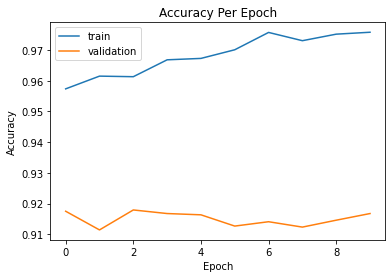

In [52]:
plt.plot(mnist_model_2d_3_aug_data_history.history['accuracy'])
plt.plot(mnist_model_2d_3_aug_data_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

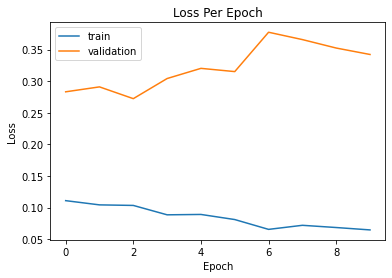

In [53]:
plt.plot(mnist_model_2d_3_aug_data_history.history['loss'])
plt.plot(mnist_model_2d_3_aug_data_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [54]:
mnist_model_2d_5_aug_data = clone_model(mnist_model_2d_5)

In [55]:
mnist_model_2d_5_aug_data.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [56]:
mnist_model_2d_5_aug_data_history = mnist_model_2d_5_aug_data.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train)/64, epochs=10, verbose=1)
mnist_model_2d_5_aug_data.save_weights('/content/gdrive/My Drive/mnist_model_2d_5_aug_data.h5')

Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.5812 - accuracy: 0.7840 - sparse_categorical_crossentropy: 0.5812 - val_loss: 0.3670 - val_accuracy: 0.8663 - val_sparse_categorical_crossentropy: 0.3670
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3556 - accuracy: 0.8677 - sparse_categorical_crossentropy: 0.3556 - val_loss: 0.3214 - val_accuracy: 0.8810 - val_sparse_categorical_crossentropy: 0.3214
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3104 - accuracy: 0.8848 - sparse_categorical_crossentropy: 0.3104 - val_loss: 0.2839 - val_accuracy: 0.8924 - val_sparse_categorical_crossentropy: 0.2839
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2844 - accuracy: 0.8945 - sparse_categorical_crossentropy: 0.2844 - val_loss: 0.2699 - val_accuracy: 0.9014 - val_sparse_categorical_crossentropy: 0.2699
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0

In [57]:
mnist_model_2d_5_aug_data_score = mnist_model_2d_5_aug_data.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.9041 - sparse_categorical_crossentropy: 0.2717


## I tried using model 5 from the previous part, but again, there is no significant improvement. The plots also look unimpressive.

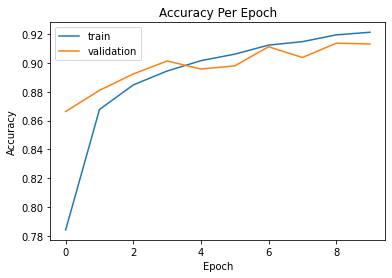

In [58]:
plt.plot(mnist_model_2d_5_aug_data_history.history['accuracy'])
plt.plot(mnist_model_2d_5_aug_data_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

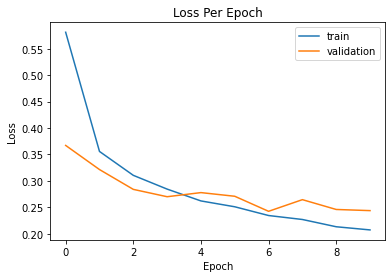

In [59]:
plt.plot(mnist_model_2d_5_aug_data_history.history['loss'])
plt.plot(mnist_model_2d_5_aug_data_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [66]:
mnist_model_2d_2_aug_data = clone_model(mnist_model_2d_2)

In [67]:
mnist_model_2d_2_aug_data.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [68]:
mnist_model_2d_2_aug_data_history = mnist_model_2d_2_aug_data.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train)/64, epochs=10, verbose=1)
mnist_model_2d_2_aug_data.save_weights('/content/gdrive/My Drive/mnist_model_2d_2_aug_data_2.h5')

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.5661 - accuracy: 0.7890 - sparse_categorical_crossentropy: 0.5661 - val_loss: 0.3820 - val_accuracy: 0.8597 - val_sparse_categorical_crossentropy: 0.3820
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3541 - accuracy: 0.8677 - sparse_categorical_crossentropy: 0.3541 - val_loss: 0.3246 - val_accuracy: 0.8801 - val_sparse_categorical_crossentropy: 0.3246
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2931 - accuracy: 0.8921 - sparse_categorical_crossentropy: 0.2931 - val_loss: 0.2872 - val_accuracy: 0.8940 - val_sparse_categorical_crossentropy: 0.2872
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2625 - accuracy: 0.9036 - sparse_categorical_crossentropy: 0.2625 - val_loss: 0.2633 - val_accuracy: 0.9032 - val_sparse_categorical_crossentropy: 0.2633
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2338

In [69]:
mnist_model_2d_2_aug_data_score = mnist_model_2d_2_aug_data.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.9045 - sparse_categorical_crossentropy: 0.3328


## This is just a retrained clone of the senond model from part 1. Again I am met with unsatisfactory results. By now, it is abundantly clear that a new approach is needed.

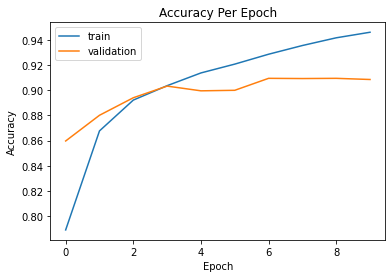

In [70]:
plt.plot(mnist_model_2d_2_aug_data_history.history['accuracy'])
plt.plot(mnist_model_2d_2_aug_data_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

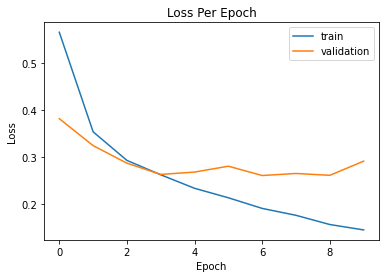

In [71]:
plt.plot(mnist_model_2d_2_aug_data_history.history['loss'])
plt.plot(mnist_model_2d_2_aug_data_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

## For the sake of comparison, here are the test accuracies of 3 models from Part I retrained on the augmented dataset. As you can see below, there is little change, perhaps because these models are too simple to learn the nuances of the dataset.

Text(0, 0.5, 'Accuracy')

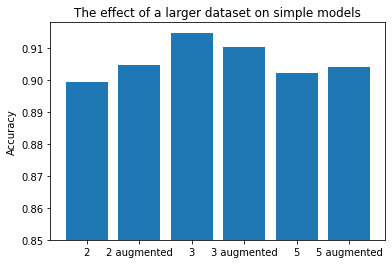

In [110]:
scores = np.array([mnist_model_2d_2_score[1], mnist_model_2d_2_aug_data_score[1], mnist_model_2d_3_score[1], mnist_model_2d_3_aug_data_score[1], mnist_model_2d_5_score[1], mnist_model_2d_5_aug_data_score[1]]) - .85
plt.bar(['2', '2 augmented', '3', '3 augmented', '5', '5 augmented'], scores, bottom=.85)
plt.title('The effect of a larger dataset on simple models')
plt.ylabel('Accuracy')

In [60]:
mnist_part2_1 = Sequential()
mnist_part2_1.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu', input_shape=(28,28,1)))
mnist_part2_1.add(layers.BatchNormalization())
mnist_part2_1.add(layers.Dropout(0.3))
mnist_part2_1.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_1.add(layers.BatchNormalization())
mnist_part2_1.add(layers.Dropout(0.3))
mnist_part2_1.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_1.add(layers.BatchNormalization())
mnist_part2_1.add(layers.Dropout(0.3))
mnist_part2_1.add(layers.Conv2D(kernel_size=7, filters=64, activation='relu'))
mnist_part2_1.add(layers.BatchNormalization())
mnist_part2_1.add(layers.Dropout(0.3))
mnist_part2_1.add(layers.Conv2D(kernel_size=7, filters=64, activation='relu'))
mnist_part2_1.add(layers.BatchNormalization())
mnist_part2_1.add(layers.Dropout(0.3))
mnist_part2_1.add(layers.Flatten())
mnist_part2_1.add(layers.Dense(256, activation='relu'))
mnist_part2_1.add(layers.Dense(10, activation='softmax'))
mnist_part2_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 23, 23, 128)      

In [61]:
mnist_part2_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [62]:
mnist_part2_1_history = mnist_part2_1.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train)/64, epochs=20, verbose=1)
mnist_part2_1.save_weights('/content/gdrive/My Drive/mnist_part2_1.h5')

Epoch 1/20
750/750 [==============================] - 21s 29ms/step - loss: 0.5412 - accuracy: 0.8098 - sparse_categorical_crossentropy: 0.5412 - val_loss: 0.4462 - val_accuracy: 0.8424 - val_sparse_categorical_crossentropy: 0.4462
Epoch 2/20
750/750 [==============================] - 21s 29ms/step - loss: 0.3122 - accuracy: 0.8863 - sparse_categorical_crossentropy: 0.3122 - val_loss: 0.3216 - val_accuracy: 0.8852 - val_sparse_categorical_crossentropy: 0.3216
Epoch 3/20
750/750 [==============================] - 21s 28ms/step - loss: 0.2724 - accuracy: 0.9022 - sparse_categorical_crossentropy: 0.2724 - val_loss: 0.2840 - val_accuracy: 0.8997 - val_sparse_categorical_crossentropy: 0.2840
Epoch 4/20
750/750 [==============================] - 21s 28ms/step - loss: 0.2370 - accuracy: 0.9142 - sparse_categorical_crossentropy: 0.2370 - val_loss: 0.2552 - val_accuracy: 0.9092 - val_sparse_categorical_crossentropy: 0.2552
Epoch 5/20
750/750 [==============================] - 21s 28ms/step - lo

In [108]:
mnist_part2_1.save_weights('/content/gdrive/My Drive/mnist_part2_1.h5')

In [63]:
mnist_part2_1_score = mnist_part2_1.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.3738 - accuracy: 0.9202 - sparse_categorical_crossentropy: 0.3738


## I have successfully beat the 0.92 testing accuracy threshold...by 0.0002. It is worth noting that the plotted accuracies and losses below look much more familiar and clearly reflect learning. It's also worth noting that the training values and the validation values are very similar for the first 3 epochs. This suggests that the augmented data matches the original dataset quite well.

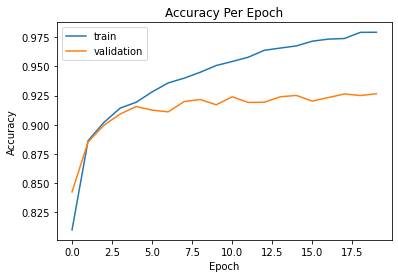

In [64]:
plt.plot(mnist_part2_1_history.history['accuracy'])
plt.plot(mnist_part2_1_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

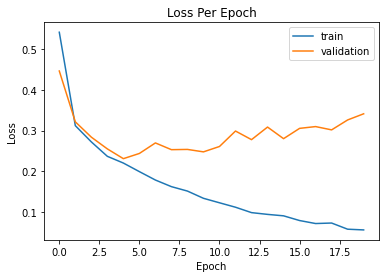

In [65]:
plt.plot(mnist_part2_1_history.history['loss'])
plt.plot(mnist_part2_1_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [111]:
predictions = mnist_part2_1.predict(x_test)
confusion_matrix_2 = confusion_matrix(y_test, predictions.argmax(axis=1))
confusion_matrix_2

array([[883,   0,  20,  14,   3,   1,  71,   0,   8,   0],
       [  1, 976,   1,  12,   2,   1,   6,   0,   1,   0],
       [ 19,   2, 890,   6,  33,   0,  48,   0,   2,   0],
       [ 14,   6,  10, 925,  21,   0,  20,   0,   4,   0],
       [  1,   0,  34,  22, 885,   0,  57,   0,   1,   0],
       [  0,   0,   0,   0,   0, 989,   0,   5,   0,   6],
       [111,   4,  50,  25,  57,   0, 742,   0,  11,   0],
       [  0,   0,   0,   0,   0,   9,   0, 966,   1,  24],
       [  2,   2,   5,   1,   1,   2,   7,   1, 979,   0],
       [  0,   0,   0,   0,   0,   7,   0,  26,   0, 967]])

## As can be seen in the confusion matrix above, shirts continue to pose a problem for the models. None the less, the model picks up the slack in other categories resulting in an impressive accuracy. It would be interesting to see how an ensemble of models could solve this problem.

In [74]:
stopper = EarlyStopping(monitor='val_accuracy', patience=3)

In [79]:
mnist_part2_2 = Sequential()
mnist_part2_2.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu', input_shape=(28,28,1)))
mnist_part2_2.add(layers.BatchNormalization())
mnist_part2_2.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_2.add(layers.BatchNormalization())
mnist_part2_2.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_2.add(layers.BatchNormalization())
mnist_part2_2.add(layers.Conv2D(kernel_size=3, filters=256, activation='relu'))
mnist_part2_2.add(layers.BatchNormalization())
mnist_part2_2.add(layers.Conv2D(kernel_size=3, filters=256, activation='relu'))
mnist_part2_2.add(layers.BatchNormalization())
mnist_part2_2.add(layers.Flatten())
mnist_part2_2.add(layers.Dense(256, activation='relu'))
mnist_part2_2.add(layers.Dense(10, activation='softmax'))
mnist_part2_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 27, 27, 128)       640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 27, 27, 128)       512       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 23, 23, 128)       147584    
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 128)       512       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 21, 21, 256)      

In [80]:
mnist_part2_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [81]:
stopper = EarlyStopping(monitor='val_accuracy', patience=3)

## The doubled output is from a brief runtime disconnect

In [82]:
mnist_part2_2_history = mnist_part2_2.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train_aug)/64, epochs=20, verbose=1)
mnist_part2_2.save_weights('/content/gdrive/My Drive/mnist_part2_2.h5')

4500/4500 [==============================] - 202s 45ms/step - loss: 0.1681 - accuracy: 0.9425 - sparse_categorical_crossentropy: 0.1681 - val_loss: 0.3935 - val_accuracy: 0.8896 - val_sparse_categorical_crossentropy: 0.3935
Epoch 3/20
4500/4500 [==============================] - 201s 45ms/step - loss: 0.0690 - accuracy: 0.9770 - sparse_categorical_crossentropy: 0.0690 - val_loss: 0.4185 - val_accuracy: 0.9187 - val_sparse_categorical_crossentropy: 0.4185
Epoch 4/20
4500/4500 [==============================] - 200s 45ms/step - loss: 0.0376 - accuracy: 0.9876 - sparse_categorical_crossentropy: 0.0376 - val_loss: 0.4912 - val_accuracy: 0.9171 - val_sparse_categorical_crossentropy: 0.4912
Epoch 5/20
4500/4500 [==============================] - 201s 45ms/step - loss: 0.0281 - accuracy: 0.9907 - sparse_categorical_crossentropy: 0.0281 - val_loss: 0.5176 - val_accuracy: 0.9169 - val_sparse_categorical_crossentropy: 0.5176
Epoch 6/20
4500/4500 [==============================] - 200s 45ms/step 

In [83]:
mnist_part2_2_score = mnist_part2_2.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 1.1090 - accuracy: 0.9113 - sparse_categorical_crossentropy: 1.1090


## This model used several convolutional layers of small kernels with plenty of filters. The accuracy is unimpressive for a network of this size, and the plots are not what you want to see. On to the next model.

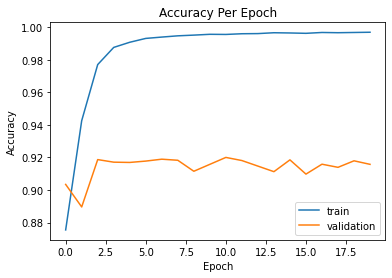

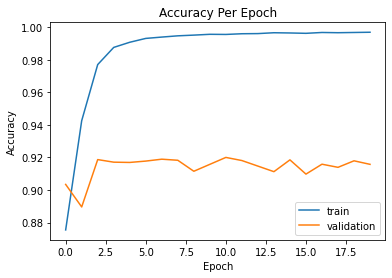

In [84]:
plt.plot(mnist_part2_2_history.history['accuracy'])
plt.plot(mnist_part2_2_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

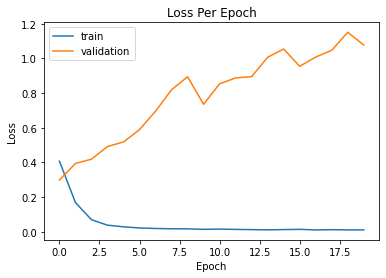

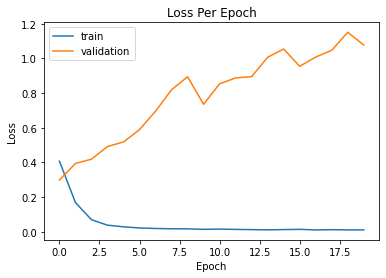

In [85]:
plt.plot(mnist_part2_2_history.history['loss'])
plt.plot(mnist_part2_2_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [91]:
mnist_part2_4 = Sequential()
mnist_part2_4.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu', input_shape=(28,28,1)))
mnist_part2_4.add(layers.Dropout(0.3))
mnist_part2_4.add(layers.BatchNormalization())
mnist_part2_4.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.3))
mnist_part2_4.add(layers.BatchNormalization())
mnist_part2_4.add(layers.Conv2D(kernel_size=3, filters=128, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.3))
mnist_part2_4.add(layers.BatchNormalization())
mnist_part2_4.add(layers.Conv2D(kernel_size=3, filters=256, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.3))
mnist_part2_4.add(layers.BatchNormalization())
mnist_part2_4.add(layers.Conv2D(kernel_size=3, filters=256, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.3))
mnist_part2_4.add(layers.BatchNormalization())
mnist_part2_4.add(layers.Flatten())
mnist_part2_4.add(layers.Dense(1024, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.25))
mnist_part2_4.add(layers.Dense(512, activation='relu'))
mnist_part2_4.add(layers.Dropout(0.25))
mnist_part2_4.add(layers.Dense(10, activation='softmax'))
mnist_part2_4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 27, 27, 128)       640       
_________________________________________________________________
dropout_24 (Dropout)         (None, 27, 27, 128)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 27, 27, 128)       512       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
dropout_25 (Dropout)         (None, 25, 25, 128)       0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 25, 25, 128)       512       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 23, 23, 128)      

In [94]:
mnist_part2_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [95]:
mnist_part2_4_history = mnist_part2_4.fit(x_train_aug, y_train_aug, batch_size = 64, validation_data=(x_valid, y_valid), steps_per_epoch=len(x_train_aug)/64, epochs=20, verbose=1, callbacks=[stopper])
mnist_part2_4.save_weights('/content/gdrive/My Drive/mnist_part2_4.h5')

Epoch 1/20
4500/4500 [==============================] - 327s 73ms/step - loss: 0.3595 - accuracy: 0.8763 - sparse_categorical_crossentropy: 0.3595 - val_loss: 0.2703 - val_accuracy: 0.9106 - val_sparse_categorical_crossentropy: 0.2703
Epoch 2/20
4500/4500 [==============================] - 324s 72ms/step - loss: 0.1601 - accuracy: 0.9470 - sparse_categorical_crossentropy: 0.1601 - val_loss: 0.4311 - val_accuracy: 0.9148 - val_sparse_categorical_crossentropy: 0.4311
Epoch 3/20
4500/4500 [==============================] - 325s 72ms/step - loss: 0.0878 - accuracy: 0.9726 - sparse_categorical_crossentropy: 0.0878 - val_loss: 0.4320 - val_accuracy: 0.9240 - val_sparse_categorical_crossentropy: 0.4320
Epoch 4/20
4500/4500 [==============================] - 323s 72ms/step - loss: 0.0583 - accuracy: 0.9831 - sparse_categorical_crossentropy: 0.0583 - val_loss: 0.5895 - val_accuracy: 0.9224 - val_sparse_categorical_crossentropy: 0.5895
Epoch 5/20
4500/4500 [==============================] - 324s

In [96]:
mnist_part2_4_score = mnist_part2_4.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.4374 - accuracy: 0.9049 - sparse_categorical_crossentropy: 0.4374


## The accuracy is not great, and the model stopped training after failing to improve its validation accuracy for 3 consecutive epochs. Condsidering it ended on epoch 5, it needs major tweaking to its parameters.

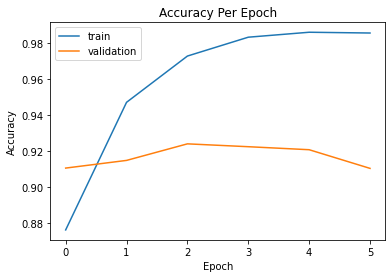

In [97]:
plt.plot(mnist_part2_4_history.history['accuracy'])
plt.plot(mnist_part2_4_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

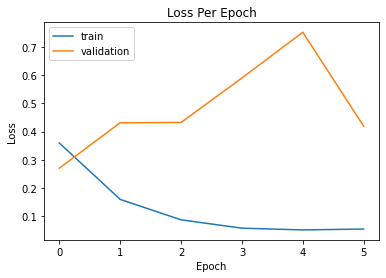

In [98]:
plt.plot(mnist_part2_4_history.history['loss'])
plt.plot(mnist_part2_4_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])